In [1]:
import pandas as pd
import pandasql as ps
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
#pip install pandasql

In [3]:
df1 = pd.read_csv('concepts_data_0_to_1.csv')

In [4]:
df2 = pd.read_csv('concepts_data_1_to_1325.csv')

In [5]:
dfData = df1.append(df2)

In [6]:
dfData.head(100)

,Unnamed: 0,doc_name,doc_type,cocept_id,phrase_type,phrase_text,phrase_count,time_stamp
0,0,dummyText.txt,test_type,0,testLable,test Phrase,0,01-01-1900 01:01:01
1,0,dummyText.txt,test_type,0,testLable,test Phrase,0,01-01-1900 01:01:01
2,0,AI08_2016.txt,admin%20instructions,64,prefLabel,activity,2,2021-11-24 07:57:09.861946
3,0,AI08_2016.txt,admin%20instructions,80,prefLabel,agreement,2,2021-11-24 07:57:09.863642
4,0,AI08_2016.txt,admin%20instructions,108,altLabel,aircraft,1,2021-11-24 07:57:09.865015
...,...,...,...,...,...,...,...,...
25,0,AI120_2017.txt,admin%20instructions,1098,prefLabel,expired,1,2021-11-23 09:37:31.822465
26,0,AI120_2017.txt,admin%20instructions,1124,acronym,FAR,13,2021-11-23 09:37:31.824374
27,0,AI120_2017.txt,admin%20instructions,1177,altLabel,Financial Management Regulation,1,2021-11-23 09:37:31.826689
28,0,AI120_2017.txt,admin%20instructions,1234,prefLabel,format,2,2021-11-23 09:37:31.828621


In [7]:
dfData.doc_type = dfData.doc_type.replace({"admin%20instructions": "admin instructions"})

In [8]:
dfData

,Unnamed: 0,doc_name,doc_type,cocept_id,phrase_type,phrase_text,phrase_count,time_stamp
0,0,dummyText.txt,test_type,0,testLable,test Phrase,0,01-01-1900 01:01:01
1,0,dummyText.txt,test_type,0,testLable,test Phrase,0,01-01-1900 01:01:01
2,0,AI08_2016.txt,admin instructions,64,prefLabel,activity,2,2021-11-24 07:57:09.861946
3,0,AI08_2016.txt,admin instructions,80,prefLabel,agreement,2,2021-11-24 07:57:09.863642
4,0,AI08_2016.txt,admin instructions,108,altLabel,aircraft,1,2021-11-24 07:57:09.865015
...,...,...,...,...,...,...,...,...
103959,0,SIPR Placeholder S-D..>,memos,216,prefLabel,authorized,1,2021-11-24 01:21:28.544601
103960,0,SIPR Placeholder S-D..>,memos,522,prefLabel,controlled,2,2021-11-24 01:21:28.547357
103961,0,SIPR Placeholder S-D..>,memos,911,prefLabel,documents,1,2021-11-24 01:21:28.549455
103962,0,SIPR Placeholder S-D..>,memos,1680,prefLabel,may,1,2021-11-24 01:21:28.551788


#### Number of Documents Processed by Document Type

This graph shows the number of documents processed by Document Type (Admin Instructions, Directives, Instructions, Manuals and Memos)


In [9]:
q1 = """SELECT doc_type Type,count(distinct doc_name) cnt 
          FROM dfData 
         WHERE doc_type != 'test_type'  
         GROUP BY doc_type """

In [10]:
df = ps.sqldf(q1, locals())

In [11]:
df

,Type,cnt
0,admin instructions,43
1,directives,301
2,instructions,773
3,manuals,178
4,memos,30


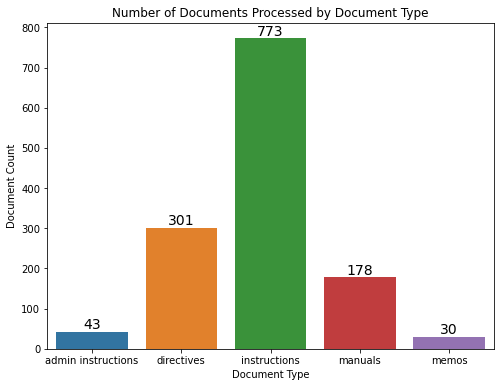

In [12]:
plt.figure(figsize=(8,6))
myplot = sns.barplot(data=df,x=df.Type,y=df.cnt)
myplot =.barplot(data=df,x=df.Type,y=df.cnt)
plt.ylabel('Document Count')
plt.xlabel('Document Type')
plt.title('Number of Documents Processed by Document Type')

for rect in myplot.patches:
    xcoor = rect.get_x() + .5*rect.get_width()
    ycoor = rect.get_height()
    plt.text(xcoor, ycoor, str(int(ycoor)), 
             horizontalalignment='center', 
             verticalalignment='bottom',
             fontsize=14)

## Distinct Concepts Count

In [13]:
q1 = """SELECT count(distinct cocept_id) cnt 
          FROM dfData 
         WHERE doc_type != 'test_type'  """

df = ps.sqldf(q1, locals())
df

,cnt
0,2171


In [14]:
q1 = """SELECT doc_type Type,count(distinct cocept_id) cnt 
          FROM dfData 
         WHERE doc_type != 'test_type'  
         GROUP BY doc_type """

df = ps.sqldf(q1, locals())
df

,Type,cnt
0,admin instructions,395
1,directives,787
2,instructions,1383
3,manuals,2034
4,memos,288


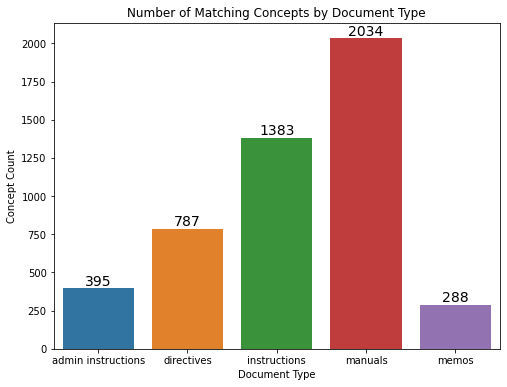

In [15]:
plt.figure(figsize=(8,6))
myplot = sns.barplot(data=df,x=df.Type,y=df.cnt)

plt.ylabel('Concept Count')
plt.xlabel('Document Type')
plt.title('Number of Matching Concepts by Document Type')

for rect in myplot.patches:
    xcoor = rect.get_x() + .5*rect.get_width()
    ycoor = rect.get_height()
    plt.text(xcoor, ycoor, str(int(ycoor)), 
             horizontalalignment='center', 
             verticalalignment='bottom',
             fontsize=14)

In [16]:
q1 = """SELECT phrase_type Type,count(distinct cocept_id) cnt 
          FROM dfData 
         WHERE doc_type != 'test_type'  
         GROUP BY phrase_type """

df = ps.sqldf(q1, locals())
df

,Type,cnt
0,acronym,658
1,altLabel,597
2,prefLabel,1721


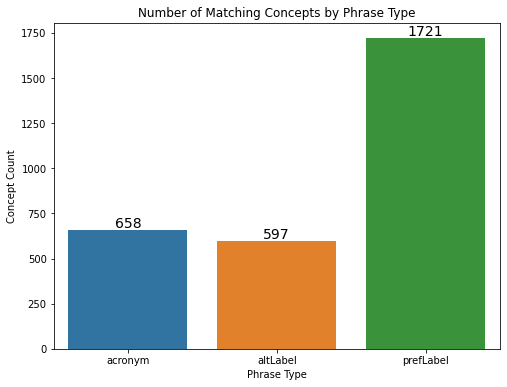

In [17]:
plt.figure(figsize=(8,6))
myplot = sns.barplot(data=df,x=df.Type,y=df.cnt)

plt.ylabel('Concept Count')
plt.xlabel('Phrase Type')
plt.title('Number of Matching Concepts by Phrase Type')

for rect in myplot.patches:
    xcoor = rect.get_x() + .5*rect.get_width()
    ycoor = rect.get_height()
    plt.text(xcoor, ycoor, str(int(ycoor)), 
             horizontalalignment='center', 
             verticalalignment='bottom',
             fontsize=14)

In [18]:
q1 = """SELECT doc_type Type,sum(phrase_count) cnt 
          FROM dfData 
         WHERE doc_type != 'test_type'  
         GROUP BY doc_type """

df = ps.sqldf(q1, locals())
df

,Type,cnt
0,admin instructions,15261
1,directives,85107
2,instructions,338538
3,manuals,280770
4,memos,6238


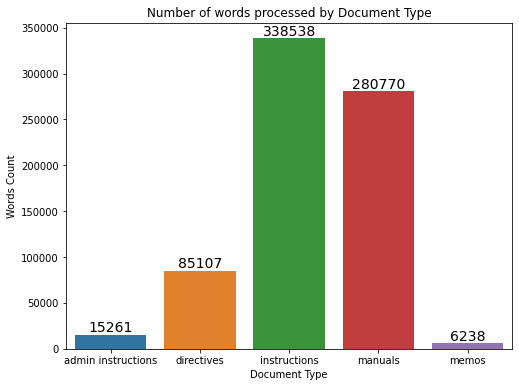

In [19]:
plt.figure(figsize=(8,6))
myplot = sns.barplot(data=df,x=df.Type,y=df.cnt)

plt.ylabel('Words Count')
plt.xlabel('Document Type')
plt.title('Number of words processed by Document Type')

for rect in myplot.patches:
    xcoor = rect.get_x() + .5*rect.get_width()
    ycoor = rect.get_height()
    plt.text(xcoor, ycoor, str(int(ycoor)), 
             horizontalalignment='center', 
             verticalalignment='bottom',
             fontsize=14)

In [20]:
df = ps.sqldf(q1, locals())
df

,Type,cnt
0,admin instructions,15261
1,directives,85107
2,instructions,338538
3,manuals,280770
4,memos,6238


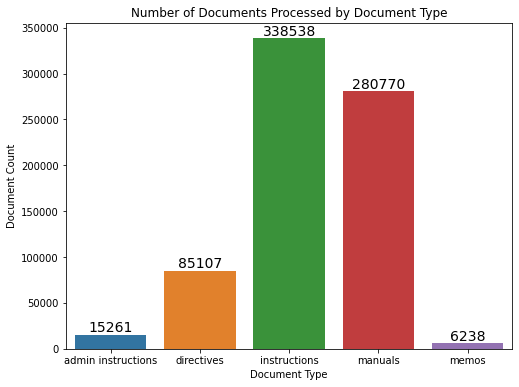

In [21]:
plt.figure(figsize=(8,6))
myplot = sns.barplot(data=df,x=df.Type,y=df.cnt)

plt.ylabel('Document Count')
plt.xlabel('Document Type')
plt.title('Number of Documents Processed by Document Type')

for rect in myplot.patches:
    xcoor = rect.get_x() + .5*rect.get_width()
    ycoor = rect.get_height()
    plt.text(xcoor, ycoor, str(int(ycoor)), 
             horizontalalignment='center', 
             verticalalignment='bottom',
             fontsize=14)

In [22]:
q1 = """SELECT cocept_id,count(phrase_text) cnt 
          FROM dfData 
         WHERE doc_type != 'test_type'  
         GROUP BY cocept_id 
         ORDER BY count(phrase_text) DESC 
         LIMIT 10 """

df = ps.sqldf(q1, locals())
df

,cocept_id,cnt
0,2564,2176
1,2604,1979
2,338,1605
3,1892,1497
4,2589,1333
5,767,1324
6,392,1252
7,1528,1231
8,646,1230
9,1417,1224
